# Homework 1: Boston Housing Price Prediction
Rand Hidayah, uni: rgh2124

Based on the Data Set: https://www.kaggle.com/c/boston-housing (https://www.kaggle.com/c/bostonhousing) 

Homework Prompt:
(25 pts) Describe the data:
What missing values are there?
What are the summary statistics of the numerical features?
What do the distributions of the features look like?
(25 pts) What features are most correlated with housing price?
(25 pts) Generate a new feature based on the existing dataset that you think would help explain housing prices and plot its relationship with housing price.
(25 pts) With scikit-learn, develop a model with the training data and make predictions on the test data. Plot your predictions.
Please submit your final work as a Jupyter notebook. Upload it to Courseworks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import scipy as scp

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display

**Getting to know my data.**

In [17]:
train_data = pd.read_csv('test.csv')
# train_data
train_data.shape

(173, 14)

In [18]:
train_data.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
dtype: object

**What missing values are there?** 

In [20]:
train_data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

There are no missing values in my training data. Which is great. According to: https://goo.gl/ShB4En, there are several ways to deal with missing data in data sets. However, we'll just be happy with having none in the training data. I will repeat the above steps for the testing data as well.

In [26]:
test_data = pd.read_csv('test.csv')
# train_data
display(test_data.shape) # to get Jupyter to show me these things in one output
display(test_data.dtypes)
display(test_data.isnull().sum())

(173, 14)

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
dtype: object

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

Again no missing data in my data set as shown by the last array called by pandas.isnull(). 

**What are the summary statistics of the numerical features?**

I want to look at means and standrad deviations, ranges and percentiles.

In [29]:
train_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


None of the data seems to be of a mixed type (numeral and alphanumeral). All data is numeric but we have some ordinal values.  crim, zn, indus, nox, rm, age, dis, tax, ptratio, black, lstat, medv are ration type numerical data. chas is categorical ordinal.

Some other aspects we can look at for statistics are normality and homegenity of the data set, just in case that comes up in a consideration a later on.

In [ ]:
# normlaity, homgenity columnwise

**What do the distributions of the features look like?**

In [75]:
columnList = list(train_data)

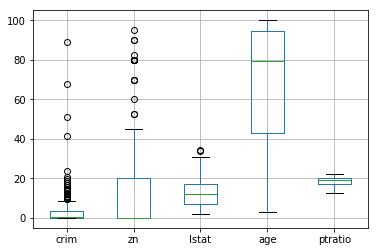

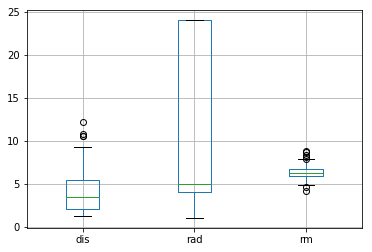

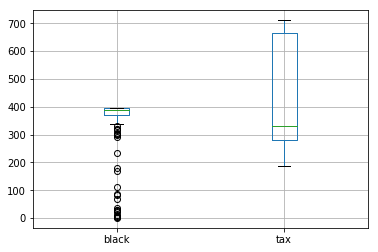

In [92]:
train_data.boxplot(column=['crim', 'zn', 'lstat', 'age', 'ptratio'])
plt.figure()
train_data.boxplot(column=['dis', 'rad', 'rm'])
plt.figure()
train_data.boxplot(column=['black', 'tax'])


Crime and Zone are variables which range from 0-X. The other variables follow a typical distribution aorund some mean or median. We note that there are outliers in the per capita crime rate by town, zoned land, rooms per dwelling and proportion of african-americans by town. Radial highways accessiblity, taxes and age also seem to show a non-typical skewed distribution. This is a first pass loook at the data and what the datat set looks like before I start delving into the features and aspeocts of what's happening.